In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [33]:
shake_bi = pd.read_csv('../data/bigram_titles_pos.csv')
shake_tri = pd.read_csv('../data/trigram_titles_pos.csv')
shake_four = pd.read_csv('../data/fourgram_titles_pos.csv')

In [34]:
shake_bi.sample(5)

,title,title_tokenized,pos_tag,good_title,pos,pos1,pos2
228,us truths,"['us', 'truths']","['PRP', 'NNS']",0,"['PRP', 'NNS']",PRP,NNS
57,gentle rain,"['gentle', 'rain']","['JJ', 'NN']",1,"['JJ', 'NN']",JJ,NN
182,is hunting,"['is', 'hunting']","['VBZ', 'VBG']",0,"['VBZ', 'VBG']",VBZ,VBG
178,have scratch,"['have', 'scratch']","['VB', 'NN']",0,"['VB', 'NN']",VB,NN
233,stored full,"['stored', 'full']","['VBN', 'JJ']",0,"['VBN', 'JJ']",VBN,JJ


In [35]:
shake_tri.sample(5)

,title,title_tokenized,pos_tag,good_title,pos,pos1,pos2,pos3
81,bottom's dream,"['bottom', ""'s"", 'dream']","['NN', 'POS', 'NN']",1,"['NN', 'POS', 'NN']",NN,POS,NN
108,our little life,"['our', 'little', 'life']","['PRP$', 'JJ', 'NN']",1,"['PRP$', 'JJ', 'NN']",PRP$,JJ,NN
210,sighs they jar,"['sighs', 'they', 'jar']","['NNS', 'PRP', 'VBP']",0,"['NNS', 'PRP', 'VBP']",NNS,PRP,VBP
118,cakes and ale,"['cakes', 'and', 'ale']","['NNS', 'CC', 'NN']",1,"['NNS', 'CC', 'NN']",NNS,CC,NN
8,and thereby hangs,"['and', 'thereby', 'hangs']","['CC', 'NN', 'NNS']",1,"['CC', 'NN', 'NNS']",CC,NN,NNS


In [36]:
shake_four.sample(5)

,title,title_tokenized,pos_tag,good_title,pos,pos1,pos2,pos3,pos4
49,that he is a,"['that', 'he', 'is', 'a']","['IN', 'PRP', 'VBZ', 'DT']",0,"['IN', 'PRP', 'VBZ', 'DT']",IN,PRP,VBZ,DT
328,the rest is silence,"['the', 'rest', 'is', 'silence']","['DT', 'NN', 'VBZ', 'NN']",1,"['DT', 'NN', 'VBZ', 'NN']",DT,NN,VBZ,NN
40,mar the light by,"['mar', 'the', 'light', 'by']","['VB', 'DT', 'NN', 'IN']",0,"['VB', 'DT', 'NN', 'IN']",VB,DT,NN,IN
138,case in law is,"['case', 'in', 'law', 'is']","['NN', 'IN', 'NN', 'VBZ']",0,"['NN', 'IN', 'NN', 'VBZ']",NN,IN,NN,VBZ
173,i must have liberty,"['i', 'must', 'have', 'liberty']","['NN', 'MD', 'VB', 'NN']",1,"['NN', 'MD', 'VB', 'NN']",NN,MD,VB,NN


In [37]:
all_titles = pd.concat([shake_bi[['title', 'good_title']], 
                        shake_tri[['title', 'good_title']], 
                        shake_four[['title', 'good_title']]], ignore_index=True)
all_titles.sample(5)

,title,good_title
831,every inch a king,1
250,a better world,1
311,to dusty death,1
317,here choose i,1
310,all our yesterdays,1


In [38]:
len(all_titles)

972

In [39]:
all_titles.good_title.value_counts()

1    486
0    486
Name: good_title, dtype: int64

In [40]:
X = all_titles['title']
y = all_titles['good_title']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (729,)
X_test shape: (243,)


In [42]:
X_train.head()

358             not the glory
857          told by an idiot
633            should not for
31            golden opinions
927    though this be madness
Name: title, dtype: object

### Prep Data ###

Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers

In [43]:
tokenizer = Tokenizer(num_words=None, filters='\t\n')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#Note: Default filters are '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [44]:
X_train_seq[0:5]

[[8, 1, 106], [280, 25, 63, 281], [78, 8, 15], [107, 282], [283, 11, 19, 284]]

Pad the sequences so each sequence is the same length

In [45]:
type(X_train_seq)

list

In [46]:
all_len = set([len(item) for item in X_train_seq])
all_len

{2, 3, 4}

In [47]:
X_train_seq_padded = pad_sequences(X_train_seq, 4)
X_test_seq_padded = pad_sequences(X_test_seq, 4)

X_train_seq_padded[0:5]

array([[  0,   8,   1, 106],
       [280,  25,  63, 281],
       [  0,  78,   8,  15],
       [  0,   0, 107, 282],
       [283,  11,  19, 284]])

In [48]:
X_train_seq_padded

array([[  0,   8,   1, 106],
       [280,  25,  63, 281],
       [  0,  78,   8,  15],
       ...,
       [  0, 947,   5, 948],
       [  1, 949,   2, 255],
       [ 11, 950,   2,  43]])

In [49]:
type(X_train_seq_padded)

numpy.ndarray

### Build and Evaluate RNN ###

Functions to calculate precision and recall and plots previously defined in the invaluable training provided by *Advanced NLP with Python for Machine Learning* course developed by Derek Jedamski through LinkedIn Learning

In [2]:
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

First run of model gave this error: `InvalidArgumentError:  indices[24,2] = 942 is not in [0, 936)` I began my investigation (below) with this parameter: `model.add(Embedding(len(tokenizer.index_word)+1, 32))`. By only taking words, it omitted punctuation.

In [67]:
#Input Dimensionality

max_features = len(tokenizer.index_word)+1
max_features

948

The third layer is a Dense layer, a standard, fully connected layer that includes some kind of transformation, and I used the `relu` activation function for this.
The final layer is where the prediction is made (hence the dimensionality of 1), and the `sigmoid` activation function is used for this.

In [70]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+10, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          30624     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 40,033
Trainable params: 40,033
Non-trainable params: 0
_________________________________________________________________


The optimizer is how the model improves with each step. Here, I used `optimizer='adam'`

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [72]:
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
23/23 [==============================] - 3s 29ms/step - loss: 0.6926 - accuracy: 0.5113 - precision_m: 0.5127 - recall_m: 0.8290 - val_loss: 0.6879 - val_accuracy: 0.6667 - val_precision_m: 0.6090 - val_recall_m: 0.9175
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.7951 - precision_m: 0.7446 - recall_m: 0.8980 - val_loss: 0.6652 - val_accuracy: 0.7078 - val_precision_m: 0.6426 - val_recall_m: 0.9253
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6292 - accuracy: 0.8461 - precision_m: 0.8052 - recall_m: 0.9301 - val_loss: 0.5862 - val_accuracy: 0.7737 - val_precision_m: 0.7567 - val_recall_m: 0.8338
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4699 - accuracy: 0.8732 - precision_m: 0.8569 - recall_m: 0.8870 - val_loss: 0.4752 - val_accuracy: 0.8066 - val_precision_m: 0.7927 - val_recall_m: 0.8396
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.2060 

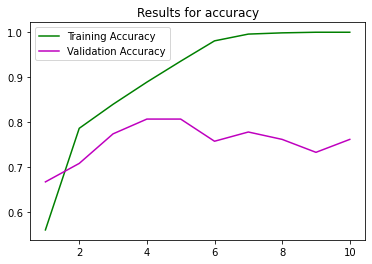

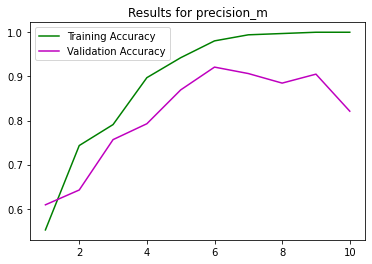

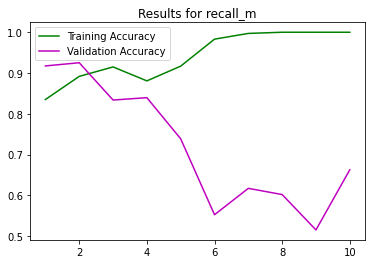

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy', color='g')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='m')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

In [77]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+10, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          30624     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 40,033
Trainable params: 40,033
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [79]:
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
23/23 [==============================] - 3s 32ms/step - loss: 0.6933 - accuracy: 0.4997 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6931 - val_accuracy: 0.4979 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5118 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6916 - val_accuracy: 0.4979 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5634 - precision_m: 0.2690 - recall_m: 0.1805 - val_loss: 0.6835 - val_accuracy: 0.6255 - val_precision_m: 0.5757 - val_recall_m: 0.9096
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6709 - accuracy: 0.7294 - precision_m: 0.6885 - recall_m: 0.8645 - val_loss: 0.6650 - val_accuracy: 0.6379 - val_precision_m: 0.5811 - val_recall_m: 0.9309
Epoch 5/10
23/23 [=============================

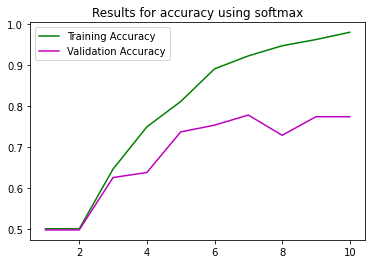

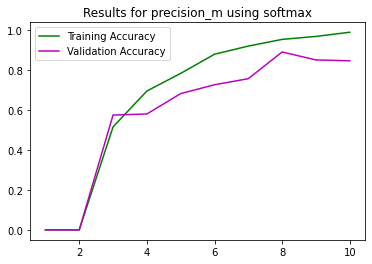

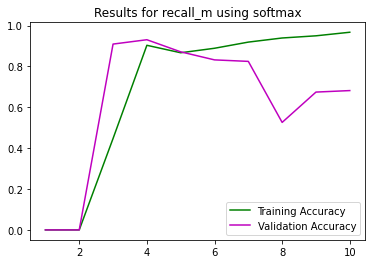

In [80]:
for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy', color='g')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='m')
    plt.title('Results for {} using softmax'.format(i))
    plt.legend()
    plt.show()

In [104]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+10, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          30624     
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 40,033
Trainable params: 40,033
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [109]:
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
23/23 [==============================] - 3s 30ms/step - loss: 0.6931 - accuracy: 0.5075 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.4979 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4909 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.6921 - val_accuracy: 0.4979 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5096 - precision_m: 0.1251 - recall_m: 0.0427 - val_loss: 0.6850 - val_accuracy: 0.6996 - val_precision_m: 0.6624 - val_recall_m: 0.8208
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.8005 - precision_m: 0.7688 - recall_m: 0.8496 - val_loss: 0.6672 - val_accuracy: 0.6337 - val_precision_m: 0.5811 - val_recall_m: 0.9096
Epoch 5/10
23/23 [=============================

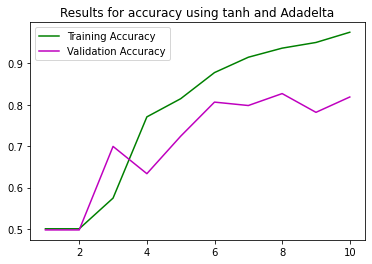

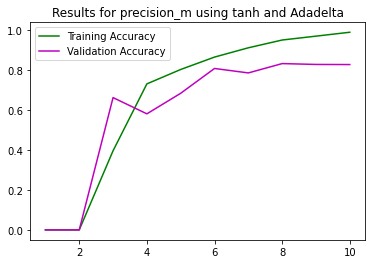

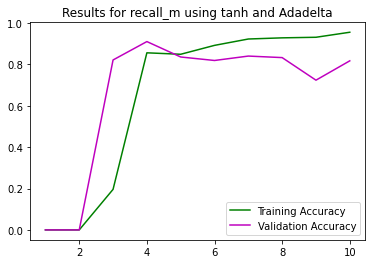

In [110]:
for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy', color='g')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='m')
    plt.title('Results for {} using tanh and Adadelta'.format(i))
    plt.legend()
    plt.show()

## With POS tags and w2v embeddings ##

In [40]:
X = pd.read_pickle('../data/X_tri.pkl')
y = pd.read_pickle('../data/y_tri.pkl')


In [41]:
X.sample()

,title,res_all,res_dp1
19,sign of fear,"[0.0300362185, -0.112493366, -0.0281299353, -0...","[0.0300362185, -0.112493366, -0.0281299353, -0..."


In [42]:
y.iloc[131]

title         lust in action
good_title                 1
Name: 131, dtype: object

In [43]:
Xa = X['res_all'].tolist()
Xd = X['res_dp1'].tolist()
y = y['good_title'].tolist()

In [45]:
Xa_train, Xa_test, y_train, y_test = train_test_split(Xa, y, test_size=0.25, random_state=46)

print('Xa_train length:', len(Xa_train))
print('Xa_test length:', len(Xa_test))

Xa_train length: 291
Xa_test length: 98


In [47]:
Xd_train, Xd_test, y_train, y_test = train_test_split(Xd, y, test_size=0.25, random_state=46)

print('Xd_train length:', len(Xd_train))
print('Xd_test length:', len(Xd_test))

Xd_train length: 291
Xd_test length: 98


In [48]:
all_len = set([len(item) for item in Xa_train])
all_len

{681}

In [49]:
type(Xa_train)

list

In [50]:
Xa_train = np.asarray(Xa_train).astype('float32')
Xa_test = np.asarray(Xa_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
Xd_train = np.asarray(Xd_train).astype('float32')
Xd_test = np.asarray(Xd_test).astype('float32')

In [51]:
type(Xa_train)

numpy.ndarray

In [55]:
model = Sequential()

#model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.summary()

In [56]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [57]:
history = model.fit(Xa_train, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(Xa_test, y_test))

Epoch 1/10
10/10 [==============================] - 1s 34ms/step - loss: 0.6820 - accuracy: 0.5118 - precision_m: 0.4859 - recall_m: 0.3447 - val_loss: 0.4525 - val_accuracy: 0.7755 - val_precision_m: 0.7445 - val_recall_m: 0.7831
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4124 - accuracy: 0.8451 - precision_m: 0.9065 - recall_m: 0.7577 - val_loss: 0.3493 - val_accuracy: 0.8367 - val_precision_m: 0.9235 - val_recall_m: 0.8143
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2628 - accuracy: 0.8977 - precision_m: 0.9553 - recall_m: 0.8264 - val_loss: 0.2955 - val_accuracy: 0.8571 - val_precision_m: 0.9260 - val_recall_m: 0.8456
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2413 - accuracy: 0.9005 - precision_m: 0.9164 - recall_m: 0.8777 - val_loss: 0.2598 - val_accuracy: 0.8980 - val_precision_m: 0.7787 - val_recall_m: 0.9688
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1865 

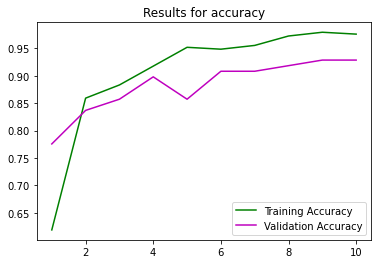

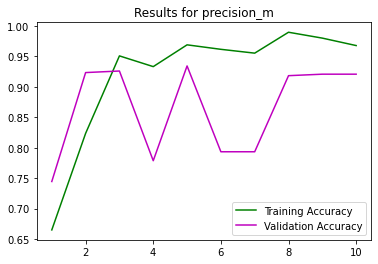

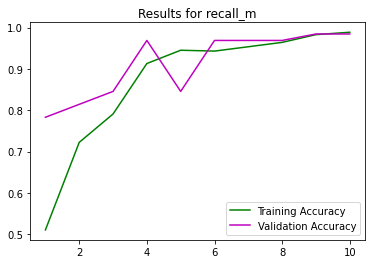

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy', color='g')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='m')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()